In [1]:
%matplotlib widget
import numpy as np
print("Imported NumPy")
import matplotlib.pyplot as plt
print("Imported Matplotlib")
from matplotlib.colors import LogNorm
print("Imported LogNorm")
import awkward as ak
import pickle 
import psutil
import os
print("Finished import")

Imported NumPy
Imported Matplotlib
Imported LogNorm
Finished import


In [2]:
print("Loading pickled track info awkward arrays...")
with open("track_info_ak_arrays.pkl", "rb") as f:
    track_data = pickle.load(f)
track_start_positions = track_data["track_start_positions"]
track_stop_positions = track_data["track_stop_positions"]
track_ids = track_data["track_ids"]
track_pids = track_data["track_pids"]
print("Loaded track info awkward arrays from track_info_ak_arrays.pkl")

Loading pickled track info awkward arrays...
Loaded track info awkward arrays from track_info_ak_arrays.pkl


Elevation: 13.00, Azimuth: 15.00


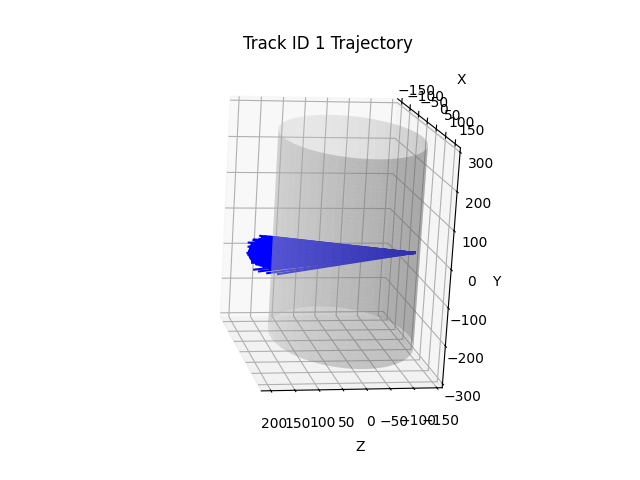

In [12]:
%matplotlib widget
start_positions = ak.firsts(track_start_positions[track_ids==1])
stop_positions = ak.firsts(track_stop_positions[track_ids==1])
#draw straight line between start and stop positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.set_title('Track ID 1 Trajectory')
for i in range(len(start_positions)):
    ax.plot([start_positions[i][0], stop_positions[i][0]], 
            [start_positions[i][1], stop_positions[i][1]], 
            [start_positions[i][2], stop_positions[i][2]], color='blue', label='Track ID 1')
# ax.scatter(start_positions[0][0], start_positions[0][1], start_positions[0][2], color='green', s=100, label='Start Position')
# ax.scatter(stop_positions[0][0], stop_positions[0][1], stop_positions[0][2], color='red', s=100, label='Stop Position')
# ax.legend()
#draw a cylinder of radius 100 cm around the y axis
u = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(-271.4235, 271.4235, 100)
x = (307.5926/2) * np.outer(np.cos(u), np.ones_like(y))
z = (307.5926/2) * np.outer(np.sin(u), np.ones_like(y))
y = np.outer(np.ones_like(u), y)
ax.plot_surface(x, y, z, color='lightgrey', alpha=0.3)

# Set initial view: y-axis up
ax.view_init(elev=13, azim=15, roll =90)  # Y-axis points up on screen
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Function to print camera angles
def on_draw(event):
    print(f"Elevation: {ax.elev:.2f}, Azimuth: {ax.azim:.2f}")

# Connect the function to the draw_event
fig.canvas.mpl_connect("draw_event", on_draw)

plt.show()